In [1]:
!nvidia-smi

Tue Sep 24 05:11:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   38C    P8              12W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import pandas as pd
df = pd.read_csv('/content/dataset.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [3]:
# Display rows with at least one null value
rows_with_null = df[df.isnull().any(axis=1)]
df1 = pd.DataFrame(rows_with_null)
df1
#print(rows_with_null)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,NaN
167,Gentoo,Biscoe,49.3,15.7,217.0,5850.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
192,Gentoo,Biscoe,NaN,13.7,208.0,3950.0,female


#1.Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)

Since for the features from seperate combination of species and island we are having only one Null value from each of bill_length_mm,	bill_depth_mm, flipper_length_mm features. So I have conisdered common values in both the island and the species then I have replaced the values of above features with the mean value of the above respective features. The sex feature is a categorical feature so I have used the mode value of filtered dataframe and replaced the Null values.

In [4]:
filtered_df = df[(df['species'] == 'Adelie') & (df['island'] == 'Torgersen')]
filtered_df = pd.DataFrame(filtered_df)
# Display the filtered data
filtered_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [5]:
columns1 = ['bill_length_mm','bill_depth_mm','flipper_length_mm',	'body_mass_g']
for i in columns1:
  filtered_df[i].fillna(filtered_df[i].mean(), inplace=True)
filtered_df['sex'].fillna(filtered_df['sex'].mode()[0], inplace=True)
filtered_df
condition = (df['species'] == 'Adelie') & (df['island'] == 'Torgersen')

# Update the original DataFrame with the values from filtered_df where the condition is true
df.update(filtered_df)

In [6]:
filtered_df1 = df[(df['species'] == 'Adelie') & (df['island'] == 'Dream')]
filtered_df1 = pd.DataFrame(filtered_df1)
filtered_df1['sex'].fillna(filtered_df1['sex'].mode()[0], inplace=True)
condition = (df['species'] == 'Adelie') & (df['island'] == 'Dream')

# Update the original DataFrame with the values from filtered_df where the condition is true
df.update(filtered_df1)

In [7]:
filtered_df2 = df[(df['species'] == 'Gentoo') & (df['island'] == 'Biscoe')]
filtered_df2 = pd.DataFrame(filtered_df2)
for i in columns1:
  filtered_df2[i].fillna(filtered_df2[i].mean(), inplace=True)
filtered_df2['sex'].fillna(filtered_df2['sex'].mode()[0], inplace=True)
condition = (df['species'] == 'Gentoo') & (df['island'] == 'Biscoe')

# Update the original DataFrame with the values from filtered_df where the condition is true
df.update(filtered_df2)

In [8]:
filtered_df3 = df[(df['species'] == 'Chinstrap') & (df['island'] == 'Dream')]
filtered_df3 = pd.DataFrame(filtered_df3)
for i in columns1:
  filtered_df3[i].fillna(filtered_df3[i].mean(), inplace=True)
filtered_df3['sex'].fillna(filtered_df3['sex'].mode()[0], inplace=True)
filtered_df3
condition = (df['species'] == 'Chinstrap') & (df['island'] == 'Dream')

# Update the original DataFrame with the values from filtered_df where the condition is true
df.update(filtered_df3)

In [9]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [10]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.700000,181.000000,3750.000000,male
1,Adelie,Torgersen,39.50000,17.400000,186.000000,3800.000000,female
2,Adelie,Torgersen,40.30000,18.000000,195.000000,3250.000000,female
3,Adelie,Torgersen,38.95098,18.429412,191.196078,3919.117647,female
4,Adelie,Torgersen,36.70000,19.300000,193.000000,3450.000000,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.80000,19.800000,207.000000,4000.000000,male
340,Chinstrap,Dream,43.50000,18.100000,202.000000,3400.000000,female
341,Chinstrap,Dream,49.60000,18.200000,193.000000,3775.000000,male
342,Chinstrap,Dream,50.80000,19.000000,210.000000,4100.000000,male


In [11]:
#Average weight for the Gentoo Penguins
print(df[(df['species'] == 'Gentoo')]['body_mass_g'].mean())

5133.739837398374


In [12]:
import scipy.stats as stats

# Groupby the data according to species
species_groups = df.groupby('species')

# Create a function to calculate skewness and kurtosis
def skewness_kurtosis(group, feature):
    skew = stats.skew(group[feature].dropna())
    kurt = stats.kurtosis(group[feature].dropna(), fisher=False)  # fisher=False returns the Pearson kurtosis
    return pd.Series({'skewness': skew, 'kurtosis': kurt})

# Initialize an empty list to store results
results = []

# Loop through species and calculate skewness and kurtosis for bill_length_mm and bill_depth_mm
for species, group in species_groups:
    result_bill_length = skewness_kurtosis(group, 'bill_length_mm')
    result_bill_depth = skewness_kurtosis(group, 'bill_depth_mm')

    # Append results for each species and feature
    results.append({
        'species': species,
        'feature': 'bill_length_mm',
        'skewness': result_bill_length['skewness'],
        'kurtosis': result_bill_length['kurtosis']
    })

    results.append({
        'species': species,
        'feature': 'bill_depth_mm',
        'skewness': result_bill_depth['skewness'],
        'kurtosis': result_bill_depth['kurtosis']
    })

# Convert the results list to a DataFrame using pd.DataFrame
results_df = pd.DataFrame(results)
# Display the skewness and kurtosis analysis
results_df


,species,feature,skewness,kurtosis
0,Adelie,bill_length_mm,0.159398,2.826691
1,Adelie,bill_depth_mm,0.317721,2.920661
2,Chinstrap,bill_length_mm,-0.118673,3.005083
3,Chinstrap,bill_depth_mm,0.006726,2.101260
4,Gentoo,bill_length_mm,0.689971,4.407417
5,Gentoo,bill_depth_mm,0.321562,2.411051


In [13]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

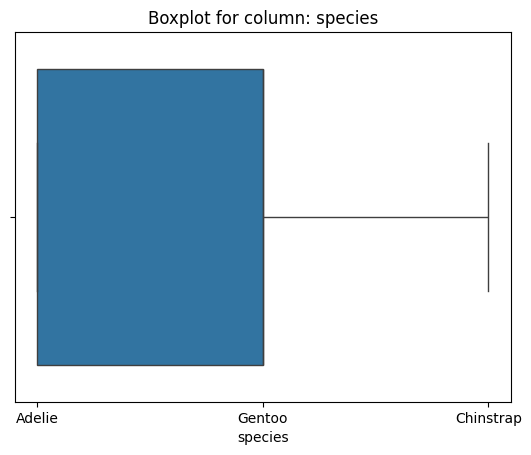

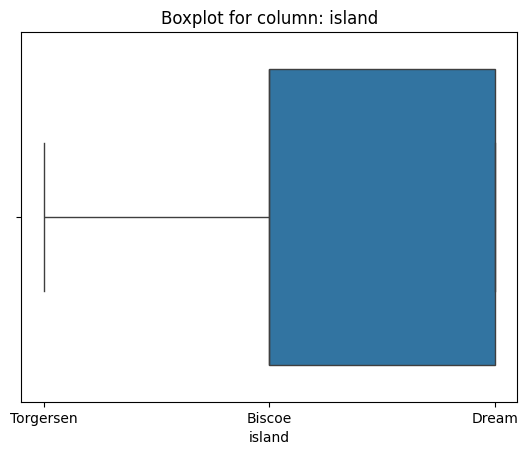

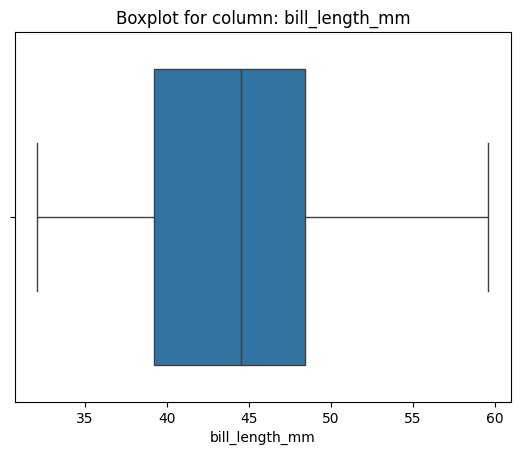

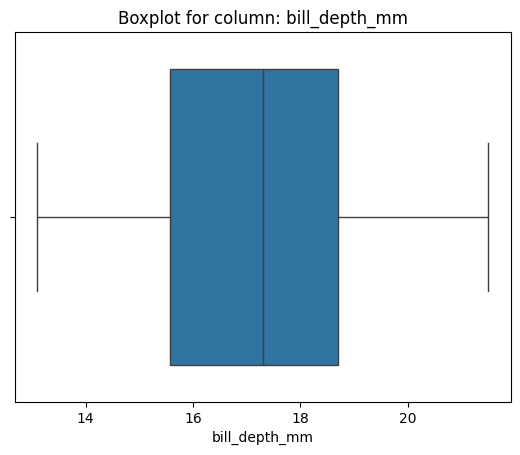

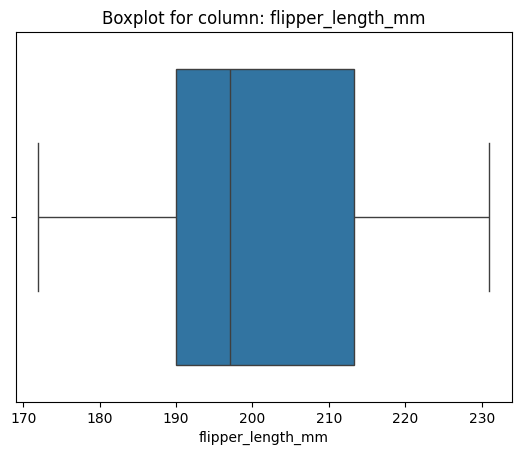

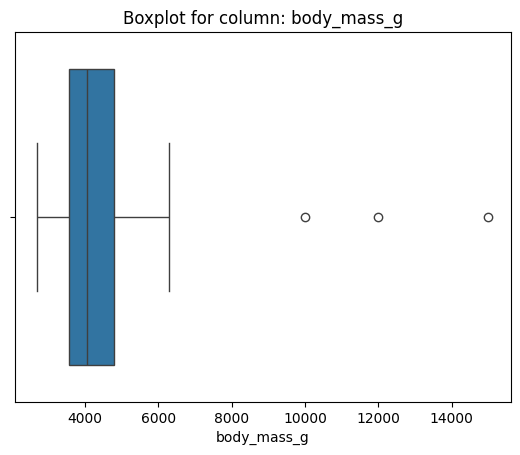

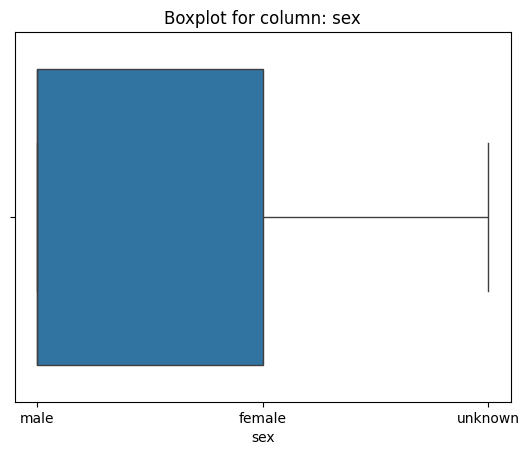

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers in a specific column
for i in df.columns:
  sns.boxplot(data=df, x=i)
  plt.title('Boxplot for column: {}'.format(i))
  plt.show()


The outliers in the body_mass_g column of a DataFrame df by calculating the first quartile (q1), third quartile (q3), and the IQR.Then computes upper and lower limits based on 1.5 times the IQR, and any values outside these limits are considered outliers. These outliers are stored in a list and later converted into a DataFrame.

In [15]:
import numpy as np
#print("Outliers in Original Data")
q1=np.percentile(df["body_mass_g"],25)
q3=np.percentile(df["body_mass_g"],75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
#print(ul,ll)
out=df["body_mass_g"]
li1=[]
li=[]
for i in range(len(out)):
  if out[i]>ul or out[i]<ll :
    li.append(df.iloc[i])
outliers=pd.DataFrame(li)
outliers

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
73,Adelie,Torgersen,45.8,18.9,197.0,15000.0,male
206,Gentoo,Biscoe,46.5,14.4,217.0,12000.0,female
324,Chinstrap,Dream,51.5,18.7,187.0,10000.0,male


In [16]:
c=df["body_mass_g"].isin(outliers["body_mass_g"])
df.drop(df[c].index,inplace=True)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.700000,181.000000,3750.000000,male
1,Adelie,Torgersen,39.50000,17.400000,186.000000,3800.000000,female
2,Adelie,Torgersen,40.30000,18.000000,195.000000,3250.000000,female
3,Adelie,Torgersen,38.95098,18.429412,191.196078,3919.117647,female
4,Adelie,Torgersen,36.70000,19.300000,193.000000,3450.000000,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.80000,19.800000,207.000000,4000.000000,male
340,Chinstrap,Dream,43.50000,18.100000,202.000000,3400.000000,female
341,Chinstrap,Dream,49.60000,18.200000,193.000000,3775.000000,male
342,Chinstrap,Dream,50.80000,19.000000,210.000000,4100.000000,male


In this case, the dataset has a low number of dimensions **(4 numerical features + 3 categorical features)**, which is unlikely to result in the curse of dimensionality. However, dimensionality reduction techniques, such as PCA (Principal Component Analysis), can still be useful for understanding variance, identifying patterns, or improving model performance by reducing noise.



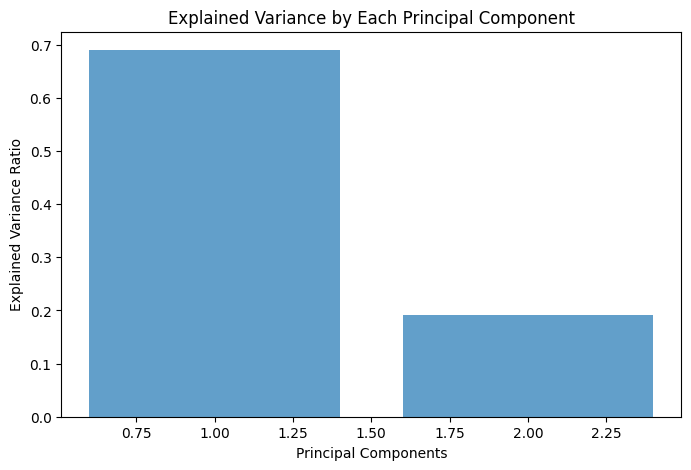

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Step 2: Extract the numerical features for PCA
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[numerical_features]

# Step 3: Standardize the data (PCA works best when data is scaled)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
pca = PCA(n_components=2)  # We reduce to 2 components for visualization purposes
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Step 5: Visualize the explained variance by each principal component
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Each Principal Component')
plt.show()

In [18]:
print(pca_df.head())

        PC1       PC2
0 -1.844965  0.055118
1 -1.308048 -0.423680
2 -1.370278 -0.149662
3 -1.269507 -0.048009
4 -1.882072  0.012094


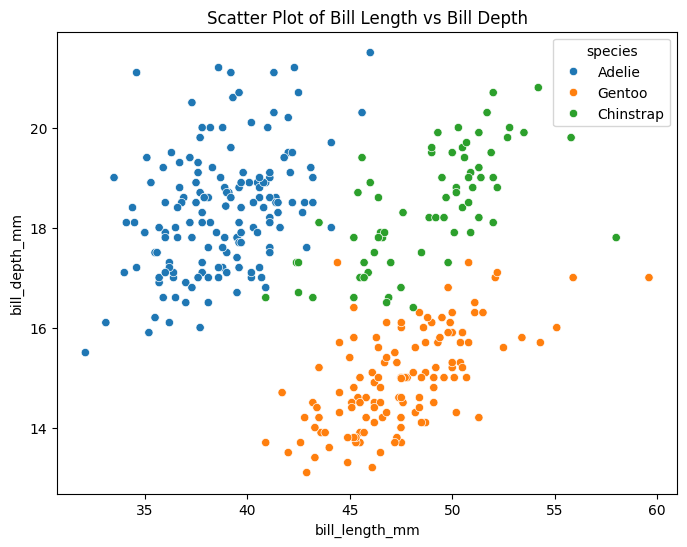

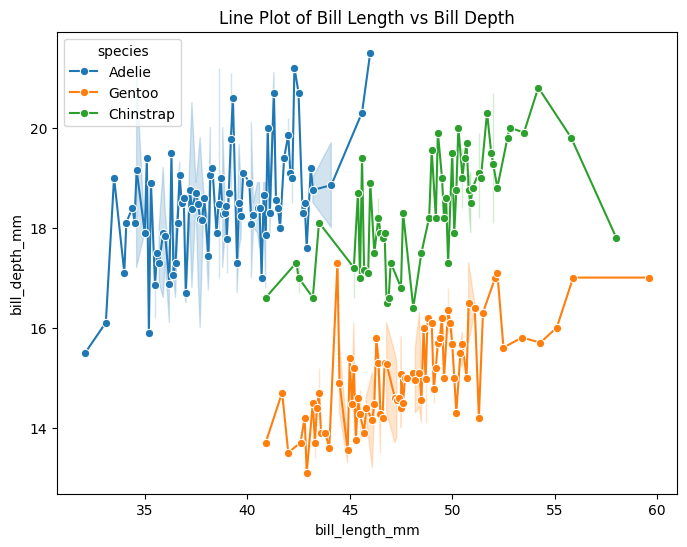

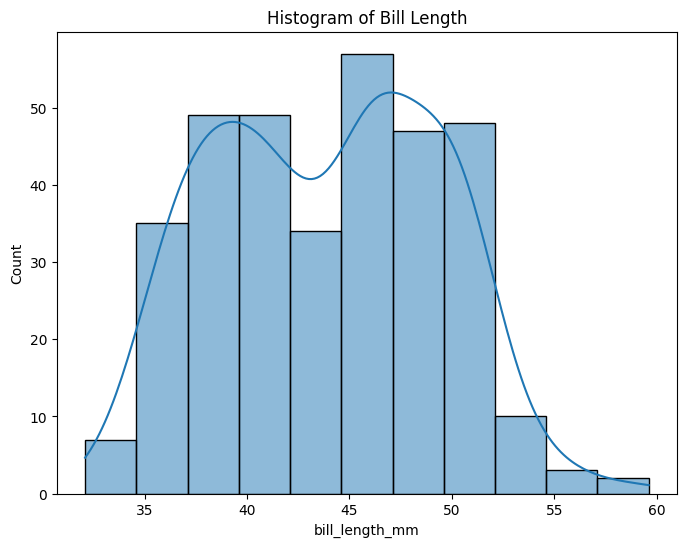

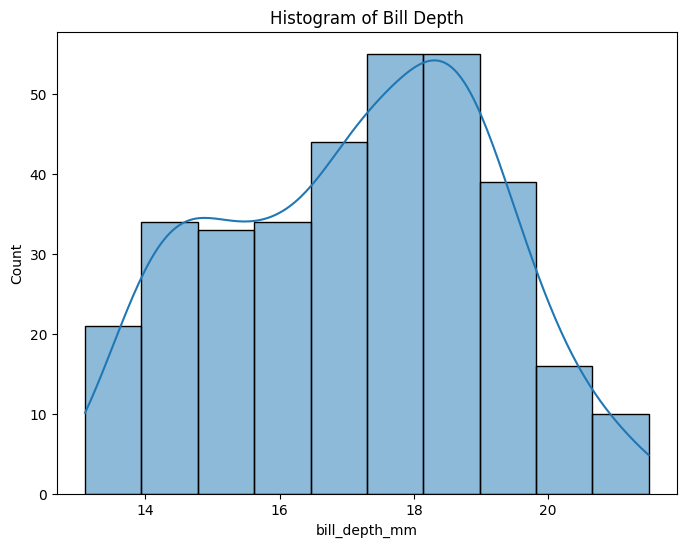

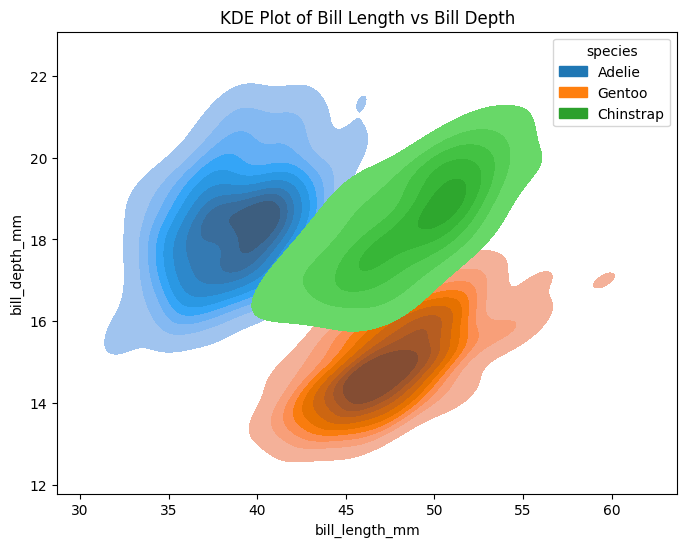

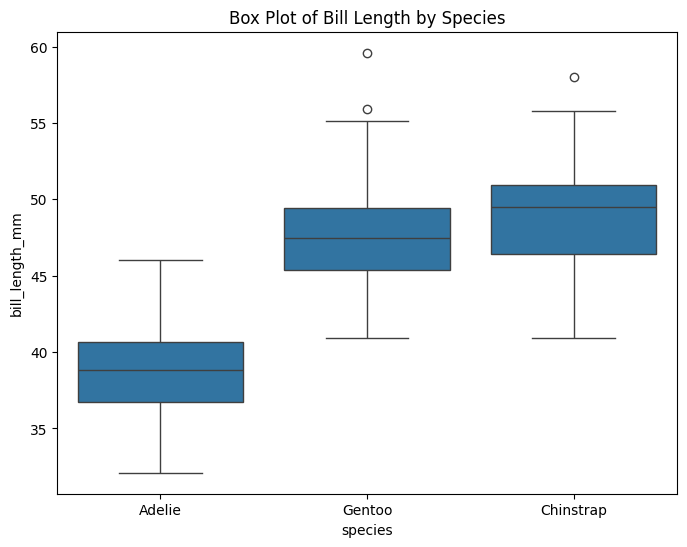

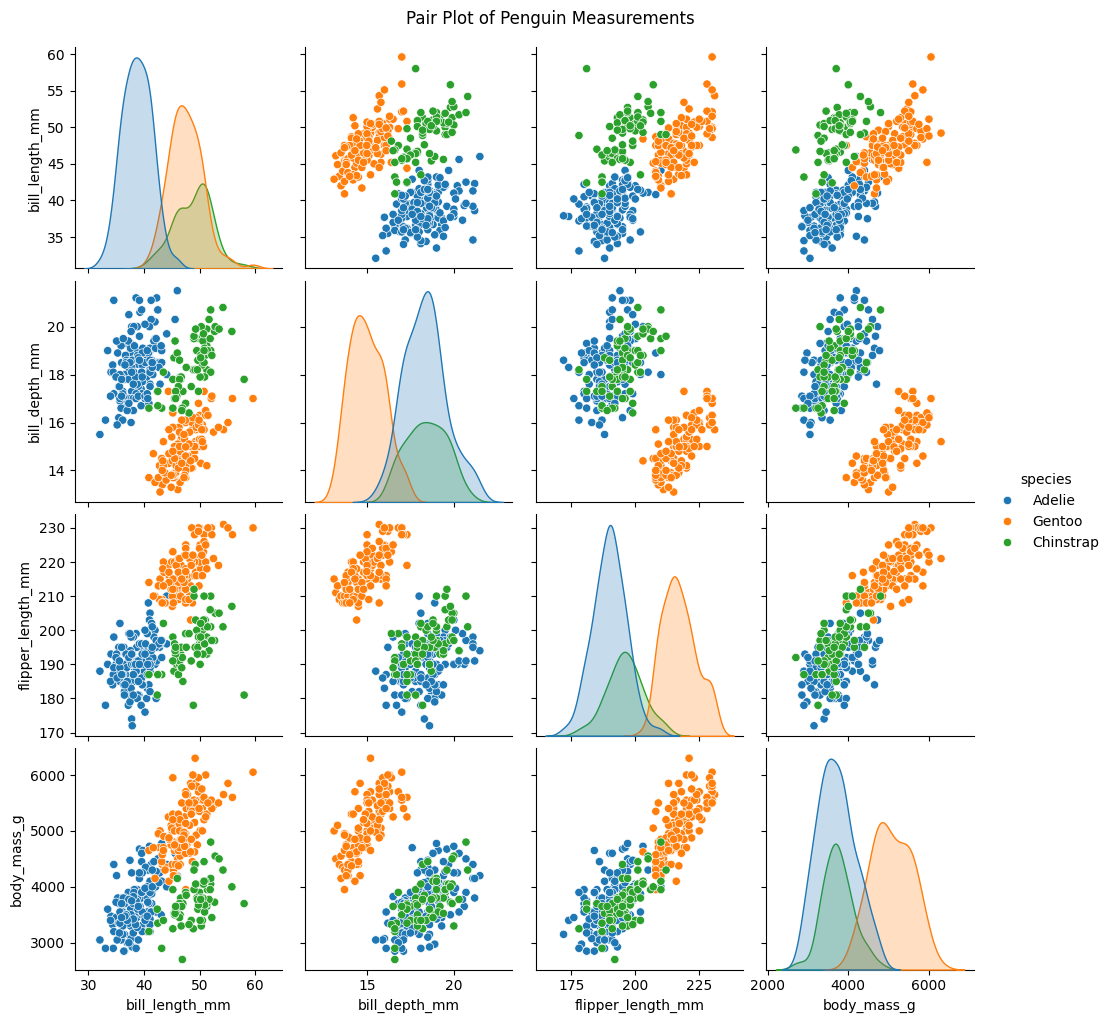

In [19]:
# 1. Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df)
plt.title('Scatter Plot of Bill Length vs Bill Depth')
plt.show()

# 2. Line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df, marker="o")
plt.title('Line Plot of Bill Length vs Bill Depth')
plt.show()

# 3. Histogram of Bill Length
plt.figure(figsize=(8, 6))
sns.histplot(df['bill_length_mm'], kde=True)
plt.title('Histogram of Bill Length')
plt.show()

# 4. Histogram of Bill Depth
plt.figure(figsize=(8, 6))
sns.histplot(df['bill_depth_mm'], kde=True)
plt.title('Histogram of Bill Depth')
plt.show()

# 5. KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=df, fill=True)
plt.title('KDE Plot of Bill Length vs Bill Depth')
plt.show()

# 6. Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='bill_length_mm', data=df)
plt.title('Box Plot of Bill Length by Species')
plt.show()

# 7. Pair plot
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle('Pair Plot of Penguin Measurements', y=1.02)
plt.show()

In [20]:
filtered_df3['flipper_length_mm'].max()

212.0

In [21]:
grouped = df.groupby(['species','island'])
grouped['flipper_length_mm'].max()

species    island   
Adelie     Biscoe       203.0
           Dream        208.0
           Torgersen    210.0
Chinstrap  Dream        212.0
Gentoo     Biscoe       231.0
Name: flipper_length_mm, dtype: float64

In [22]:
# Define the columns to be normalized
columns_to_normalize = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Initialize the StandardScaler
scaler = StandardScaler()

# Perform Z-score normalization
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the normalized data
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.879631,0.788421,-1.419146,-0.567390,male
1,Adelie,Torgersen,-0.806248,0.128461,-1.063284,-0.504978,female
2,Adelie,Torgersen,-0.659482,0.433058,-0.422732,-1.191508,female
3,Adelie,Torgersen,-0.906970,0.651054,-0.693466,-0.356292,female
4,Adelie,Torgersen,-1.319929,1.093018,-0.565077,-0.941861,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,2.184111,1.346849,0.431338,-0.255331,male
340,Chinstrap,Dream,-0.072418,0.483824,0.075476,-1.004273,female
341,Chinstrap,Dream,1.046674,0.534590,-0.565077,-0.536184,male
342,Chinstrap,Dream,1.266823,0.940720,0.644855,-0.130508,male
